$$\large \textbf{Challenge Nº3 (Support Vector Machine)}$$

Valeria Oriana Zavaleta Jave

# **1. Introducción**

Los sideróforos son compuestos químicos esenciales producidos por microorganismos para facilitar la captura y el transporte de hierro, un elemento crucial para su crecimiento y supervivencia. Estos compuestos juegan un papel fundamental en numerosos procesos biológicos, incluida la patogenicidad bacteriana, la simbiosis planta-microorganismo y la competencia microbiana por nutrientes en ambientes variados [1]. La capacidad de los sideróforos para unirse selectivamente al hierro y formar complejos estables los convierte en moléculas de gran interés en diversos campos, incluida la biomedicina, la agricultura y la biotecnología.

La identificación de los grupos quelantes en los sideróforos es crucial por las para comprender en detalle cómo los sideróforos capturan y transportan el Fe. Esto es esencial para el desarrollo de nuevas estrategias para combatir enfermedades infecciosas, mejorar la absorción de hierro en plantas y desarrollar nuevos biofertilizantes [2].

**Tipos de grupos quelantes:**

Los sideróforos se clasifican según el tipo de grupo quelante que utilizan para unirse al Fe [3]. Los grupos quelantes más comunes son:

* Hidroxamatos: Contienen un grupo hidroxamato (-CONH-OH) que se une al Fe a través del oxígeno del hidroxamato. Los sideróforos con hidroxamatos son los más abundantes y diversos.

* Catecolatos: Contienen un grupo catecolato (o-dihidroxibenceno) que se une al Fe a través de los dos grupos hidroxilo. Los sideróforos con catecolatos son menos comunes que los hidroxamatos.

* Alfa-hidroxiácidos: Contienen un grupo alfa-hidroxiácido (-CHOH-R) que se une al Fe a través del oxígeno del grupo hidroxilo. Los sideróforos con alfa-hidroxiácidos son raros.

* Fenoles: Contienen un grupo fenol (-OH) que se une al Fe a través del oxígeno del grupo hidroxilo. Los sideróforos con fenoles son muy raros.

Para identificar grupos quelantes en sideróforos, se emplean métodos analíticos como la espectroscopía (incluyendo IR, RMN y ESI-MS), cristalografía de rayos X y espectroscopía de absorción de rayos X (XAS) [4]. Estos métodos proporcionan información detallada sobre la estructura molecular y la interacción sideróforo-hierro, fundamentales para comprender su función y aplicación en diversas áreas científicas y tecnológicas.

Identificar el grupo quelante de un fluoróforo es crucial por varias razones: asegura la estabilidad del complejo, optimiza las propiedades espectrales del fluoróforo, garantiza la compatibilidad biológica y permite un control preciso sobre su química. De esta manera, se desarrollará un algoritmo que permita realizar dicha tarea de manera automatizada.

La Siderophores Database es una valiosa herramienta que recopila información detallada sobre una amplia variedad de sideróforos, incluidos datos sobre su estructura molecular, nombres, asociación con microorganismos, y tipos y números de grupos quelantes. Además, la base de datos proporciona una gama de descriptores moleculares que permiten un análisis exhaustivo de las propiedades químicas y estructurales de los sideróforos, lo que facilita la investigación y el diseño de nuevos compuestos con aplicaciones potenciales en diversas áreas científicas y tecnológicas.

# **2. Metodología**

## **2.1. Análisis descriptivo**

In [1]:
# Importamos el dataset correspondiente a los atributos y especificaciones de cada componente y los unimos en una sola matriz
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv")
df1 = pd.read_csv("https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv")

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 119 entries, ID to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32), object(1)
memory usage: 205.6+ KB


In [3]:
df.head()

,ID,Compounds,Microorganism,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other,SMILES,validate smiles,SMARTS,SELFIES
0,1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",0,1,0,1,0,0,0,OC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6](-[#8])...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
1,2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,0,1,0,1,0,0,0,c1ccc(O)c(O)c1C(=O)NCC(O)=O,True,[#6]1:[#6]:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:1...,[C][=C][C][=C][Branch1][C][O][C][Branch1][C][O...
2,3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",0,1,0,1,0,0,0,OC[C@@H](C(O)=O)NC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6]-[#6@@H](-[#6](-[#8])=[#8])-[#7]-[#6]...,[O][C][C@@H1][Branch1][=Branch1][C][Branch1][C...
3,4,"2,3-dihydroxybenzoylthreonine",Klebsiella oxytoca,0,1,0,1,0,0,0,O[C@H](C)[C@@H](C(O)=O)NC(=O)c1cccc(O)c1O,True,[#8]-[#6@H](-[#6])-[#6@@H](-[#6](-[#8])=[#8])-...,[O][C@H1][Branch1][C][C][C@@H1][Branch1][=Bran...
4,5,2-hydroxybenzoic acid,"Azospirillum lipoferum, Burkholderia cepacia",0,0,0,1,1,0,0,OC(=O)c1c(O)cccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6]:[#6]:[...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    221 non-null    object
 1   Compounds             221 non-null    object
 2   Microorganism         149 non-null    object
 3   hydroxamate           221 non-null    int64 
 4   catecholate           221 non-null    int64 
 5   a-hydroxycarboxylate  221 non-null    int64 
 6   carboxylate           221 non-null    int64 
 7   phenolate             221 non-null    int64 
 8   citrate               221 non-null    int64 
 9   other                 221 non-null    int64 
 10  SMILES                221 non-null    object
 11  validate smiles       221 non-null    bool  
 12  SMARTS                221 non-null    object
 13  SELFIES               221 non-null    object
dtypes: bool(1), int64(7), object(6)
memory usage: 22.8+ KB


In [5]:
df.describe()

,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,1.524887,0.592760,0.104072,0.389140,0.090498,0.099548,0.076923
std,1.409567,0.989372,0.407912,0.627165,0.302940,0.342517,0.267074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000


In [6]:
df1.head()

,ID,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,...,0,0,0,0,0,1,0,1,2,1
1,2,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,...,0,1,0,0,1,1,0,1,2,2
2,3,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,...,0,1,0,0,1,1,0,1,2,2
3,4,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,...,0,1,0,0,1,1,0,1,2,2
4,5,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,...,0,0,0,0,0,1,0,1,1,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 119 entries, ID to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32), object(1)
memory usage: 205.6+ KB


In [8]:
df1.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.00000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,14.361458,-5.557024,14.361458,1.244646,0.151045,652.732149,608.708548,652.316484,254.986425,0.304900,...,1.932127,3.443439,0.438914,2.98190,4.665158,0.782805,0.325792,0.588235,1.312217,1.303167
std,1.306650,1.186967,1.306650,0.508051,0.203659,246.818504,229.903744,246.675305,97.555508,0.034790,...,1.344994,2.705670,0.815825,2.83479,2.864534,1.090402,0.727833,0.985184,2.010718,2.012109
min,9.667832,-7.433673,9.667832,0.011382,0.007004,138.122000,130.082000,138.031694,52.000000,0.211046,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.693037,-6.290073,13.693037,1.036932,0.030619,474.551000,436.247000,474.257731,184.000000,0.272302,...,1.000000,2.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.222851,-5.571034,14.222851,1.280840,0.058700,684.788000,632.372000,684.369406,270.000000,0.322843,...,2.000000,3.000000,0.000000,2.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.424962,-5.211695,15.424962,1.618549,0.158075,800.952000,748.469000,800.464369,314.000000,0.331716,...,3.000000,5.000000,1.000000,6.00000,6.000000,1.000000,0.000000,1.000000,2.000000,2.000000
max,16.647474,-0.881916,16.647474,2.220550,0.881757,1198.215000,1126.647000,1197.505065,470.000000,0.371663,...,5.000000,12.000000,3.000000,8.00000,13.000000,4.000000,3.000000,3.000000,6.000000,6.000000


## **2.2. Pre-procesamiento de datos**

### **2.2.1. Asignación de targets**

In [9]:
# Se descartarán ciertas características que no son relevantes para el entrenamiento del modelo.
# Como se usaran únicamente los grupos quelantes como target, se descartan los parámetros que contienen strings.

In [10]:
columnas_a_eliminar = ['Microorganism', 'SMILES', 'validate smiles', 'SMARTS', 'SELFIES']

# Eliminar las columnas con los nombres especificados
df_clean = df.drop(columnas_a_eliminar, axis=1)
df_clean.head()

,ID,Compounds,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other
0,1,"2,3-dihydroxybenzoic acid",0,1,0,1,0,0,0
1,2,"2,3-dihydroxybenzoylglycine",0,1,0,1,0,0,0
2,3,"2,3-dihydroxybenzoylserine",0,1,0,1,0,0,0
3,4,"2,3-dihydroxybenzoylthreonine",0,1,0,1,0,0,0
4,5,2-hydroxybenzoic acid,0,0,0,1,1,0,0


In [11]:
# Para saber los valores que tiene cada columna
columns = ['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other']

for i in columns:
  print(df_clean[i].value_counts())

hydroxamate
0    91
3    85
2    22
1    18
4     5
Name: count, dtype: int64
catecholate
0    153
2     27
1     23
3     18
Name: count, dtype: int64
a-hydroxycarboxylate
0    206
2      8
1      7
Name: count, dtype: int64
carboxylate
0    148
1     63
2      8
4      1
3      1
Name: count, dtype: int64
phenolate
0    202
1     18
2      1
Name: count, dtype: int64
citrate
0    202
1     16
2      3
Name: count, dtype: int64
other
0    204
1     17
Name: count, dtype: int64


In [12]:
# Debido a que únicamente se busca identificar si un compuesto presenta o no cierto grupo quelante (no la cantidad), se reemplazará los números mayores a 1 con el mismo.
# Reemplazar valores mayores a 1 con 1 en las columnas especificadas
df_clean[columns] = df_clean[columns].applymap(lambda x: 1 if x > 1 else x)

for i in columns:
  print(df_clean[i].value_counts())

hydroxamate
1    130
0     91
Name: count, dtype: int64
catecholate
0    153
1     68
Name: count, dtype: int64
a-hydroxycarboxylate
0    206
1     15
Name: count, dtype: int64
carboxylate
0    148
1     73
Name: count, dtype: int64
phenolate
0    202
1     19
Name: count, dtype: int64
citrate
0    202
1     19
Name: count, dtype: int64
other
0    204
1     17
Name: count, dtype: int64


In [13]:
# Como hay grupos quelantes que presentan pocos compuestos que pertenecen a dicha categoría en comparación a los que no pertenecen, se descartarán debido al desbalance evidente de datos.
columnas_a_eliminar = ['a-hydroxycarboxylate', 'phenolate', 'citrate', 'other']

# Eliminar las columnas con los nombres especificados
df_clean = df_clean.drop(columnas_a_eliminar, axis=1)
df_clean.head()
columns = ['hydroxamate', 'catecholate', 'carboxylate']

for i in columns:
  print(df_clean[i].value_counts())

hydroxamate
1    130
0     91
Name: count, dtype: int64
catecholate
0    153
1     68
Name: count, dtype: int64
carboxylate
0    148
1     73
Name: count, dtype: int64


In [14]:
# Ahora sí podemos proceder a unir los dataframes basándonos en el ID de los compuestos
merged_df = pd.merge(df_clean, df1, on='ID', how='inner')

# 'inner': utiliza la intersección de las claves de ambos DataFrames
# 'outer': utiliza la unión de las claves de ambos DataFrames

merged_df.head()

,ID,Compounds,hydroxamate,catecholate,carboxylate,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,1,"2,3-dihydroxybenzoic acid",0,1,1,11.191262,-1.343472,11.191262,0.665370,0.522491,...,0,0,0,0,0,1,0,1,2,1
1,2,"2,3-dihydroxybenzoylglycine",0,1,1,12.228676,-3.436129,12.228676,0.586755,0.522624,...,0,1,0,0,1,1,0,1,2,2
2,3,"2,3-dihydroxybenzoylserine",0,1,1,12.627825,-3.816337,12.627825,0.758838,0.442264,...,0,1,0,0,1,1,0,1,2,2
3,4,"2,3-dihydroxybenzoylthreonine",0,1,1,12.854441,-4.102795,12.854441,0.884463,0.468346,...,0,1,0,0,1,1,0,1,2,2
4,5,2-hydroxybenzoic acid,0,0,1,11.108779,-1.310880,11.108779,0.630759,0.610259,...,0,0,0,0,0,1,0,1,1,0


### **2.2.2. Evaluación de parámetros**

In [15]:
# Se emplea la matris de correlación para evaluar la redundancia de los mismos, y evaluar cómo se relacionan a los targets
# Sin embargo, antes de realizar la matris de correlación, se debe tener en cuenta que en el análisis exploratorio de los parámetros (correspondientes al dataframe df1), se encontró
# que había un dato tipo object en medio de los valores, lo cual no permitirá que la matriz se ejecute correctamente, así que habrá que ubicarlo para poder eliminarlo

# Obtener los tipos de datos de todas las columnas
typef1 = df1.dtypes

# Filtrar las columnas que son de tipo 'object'
col_object = typef1[typef1 == 'object']

# Mostrar las columnas que son de tipo 'object' junto con sus nombres
for columna, tipo in col_object.items():
    print("Columna:", columna)
    print("Tipo de datos:", tipo)

Columna: ID
Tipo de datos: object


In [16]:
# Una vez identificada la columna con el error, se puede determinar que no es relevante para el modelo, por lo que se procederá a eliminar dicha columna junto con el nokmbre de los compuestos
col = ['ID','Compounds']
merged_df = merged_df.drop(col, axis=1)
merged_df.head()

,hydroxamate,catecholate,carboxylate,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,0,1,1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,...,0,0,0,0,0,1,0,1,2,1
1,0,1,1,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,...,0,1,0,0,1,1,0,1,2,2
2,0,1,1,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,...,0,1,0,0,1,1,0,1,2,2
3,0,1,1,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,...,0,1,0,0,1,1,0,1,2,2
4,0,0,1,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,...,0,0,0,0,0,1,0,1,1,0


Los coeficientes de correlación pueden ser negativos si hay una correlación negativa entre dos variables, lo que significa que cuando una variable aumenta, la otra tiende a disminuir. Sin embargo, cuando se trata de identificar la colinealidad entre características, solo nos importa la fuerza de la relación, no su dirección. Por lo tanto, tomamos el valor absoluto de los coeficientes de correlación para considerar solo la magnitud de la correlación, independientemente de su dirección.

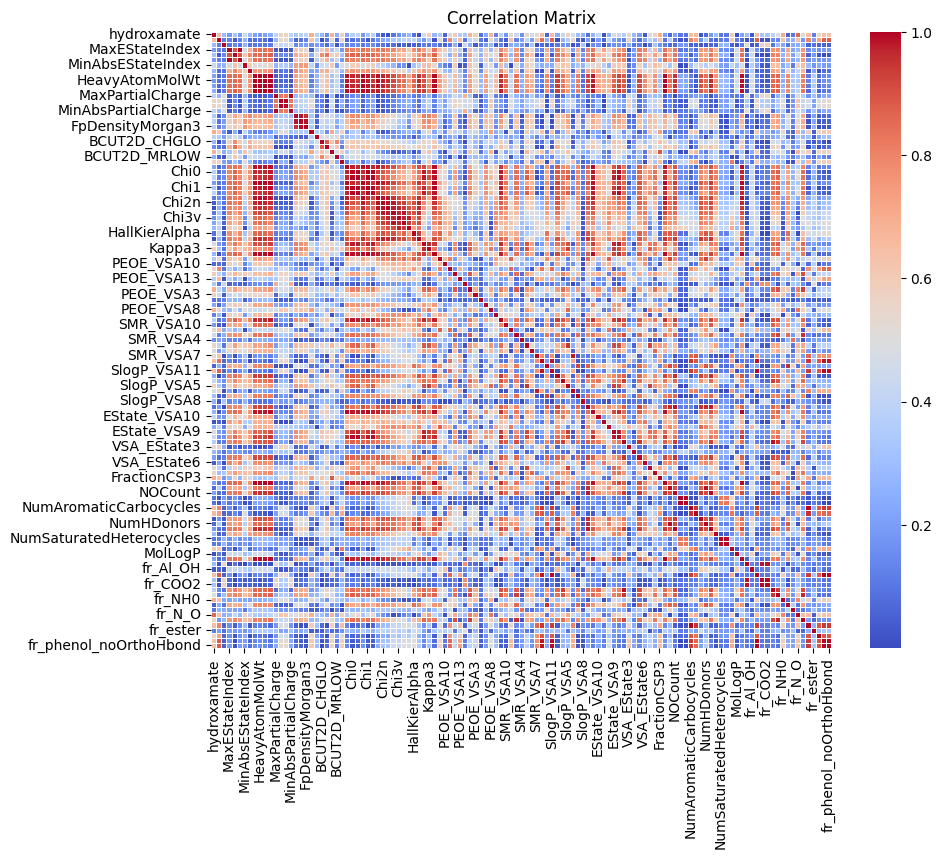

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = merged_df.corr().abs()
# Visualizar la matriz de correlación en un diagrama de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Debido a la cantidad de parámetros, no es posible determinar cuáles son redundantes de manera visual, por lo que se establecerá un valor umbral para el coeficiente de correlación, en este caso se considerará hasta un 80%
# par evitar la colinealidad

# Calcula una versión triangular superior de la matriz de correlación
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Encuentra las columnas con correlación mayor a un umbral (en este caso, 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Elimina las columnas con alta correlación del DataFrame original
df_final = merged_df.drop(to_drop, axis=1)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hydroxamate               221 non-null    int64  
 1   catecholate               221 non-null    int64  
 2   carboxylate               221 non-null    int64  
 3   MaxEStateIndex            221 non-null    float64
 4   MinAbsEStateIndex         221 non-null    float64
 5   qed                       221 non-null    float64
 6   MaxPartialCharge          221 non-null    float64
 7   FpDensityMorgan1          221 non-null    float64
 8   BCUT2D_MWHI               221 non-null    float64
 9   BCUT2D_MWLOW              221 non-null    float64
 10  BCUT2D_CHGLO              221 non-null    float64
 11  BCUT2D_MRHI               221 non-null    float64
 12  BCUT2D_MRLOW              221 non-null    float64
 13  BalabanJ                  221 non-null    float64
 14  PEOE_VSA10

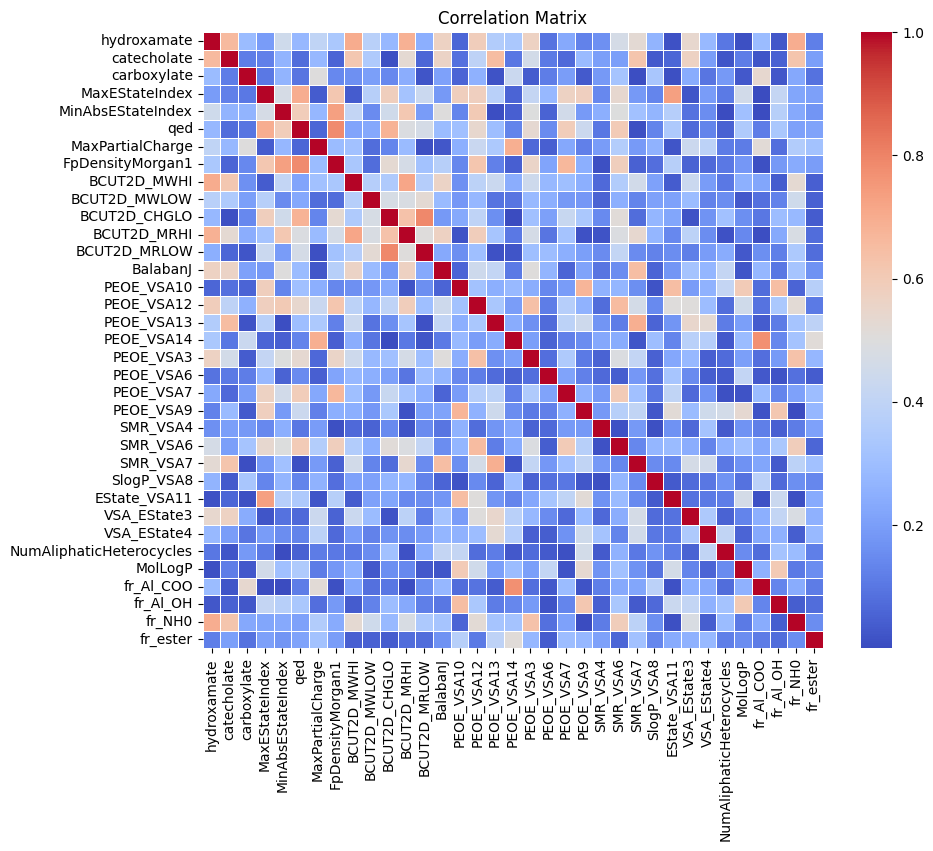

In [19]:
correlation_matrix = df_final.corr().abs()
# Visualizar la matriz de correlación en un diagrama de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Como se puede ver, se eliminaron éxitosamente los atributos que resultarían redundantes al modelo.

In [20]:
# Para corroborar que los atributos no tengan un solo valor
#for columna in df_final.columns:
#    print("Columna:", columna)
#    print(df_final[columna].value_counts())
#    print()

### **2.2.3. Limpieza de valores atípicos**

El proceso de manejo de outliers implica identificar valores extremos en un conjunto de datos, típicamente utilizando técnicas como los z-scores, y luego decidir cómo abordarlos. El z-score es una medida estadística que indica cuántas desviaciones estándar un punto de datos está por encima o por debajo de la media. Es útil para identificar outliers al estandarizar los datos y determinar qué valores están muy alejados de la media en términos de variabilidad. Un z-score alto sugiere que un punto de datos puede ser un outlier.

In [21]:
# Suponiendo que df es tu DataFrame y quieres eliminar las tres primeras columnas
df_final2 = df_final.drop(df_final.columns[:3], axis=1)

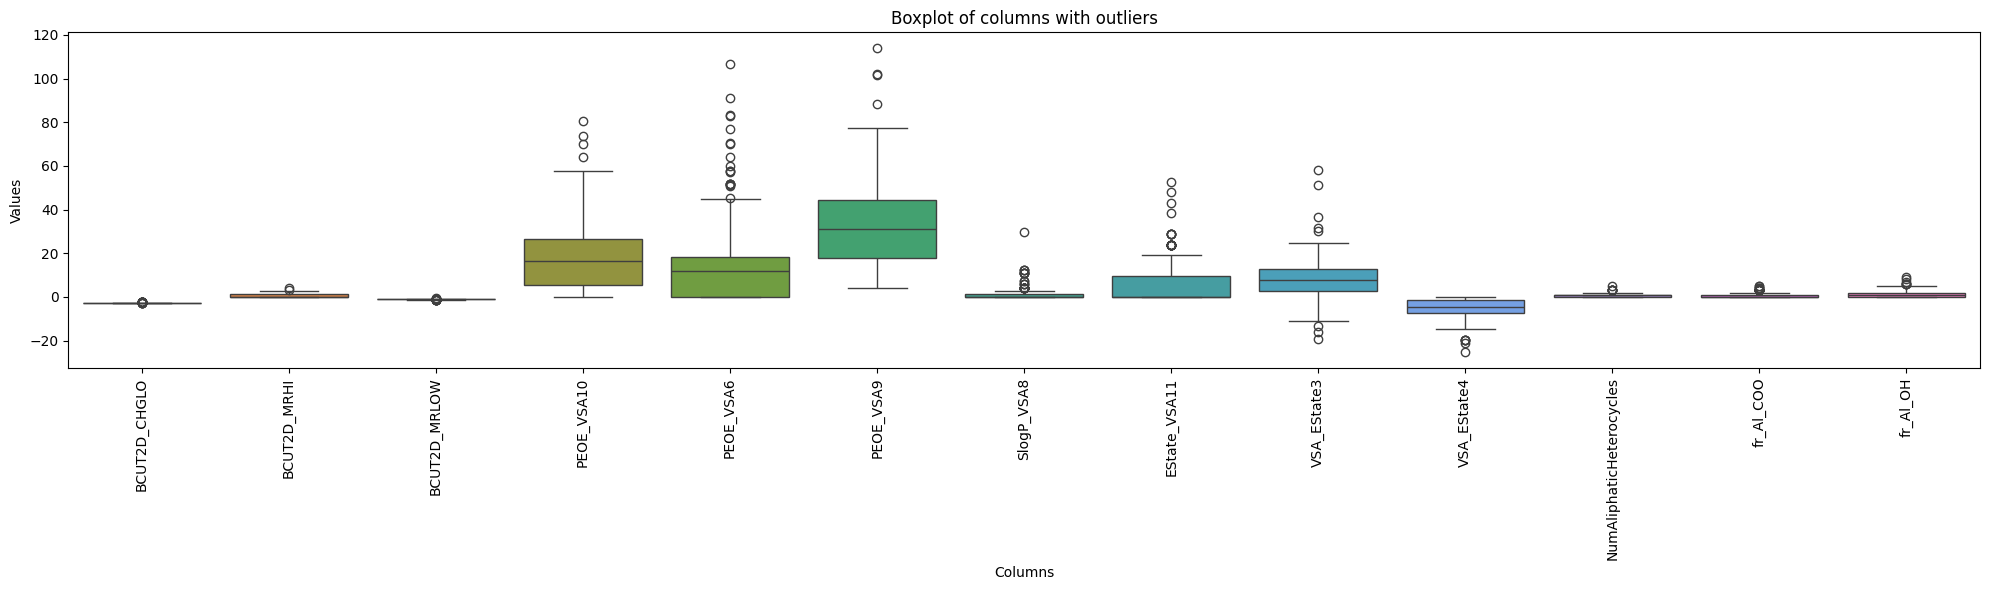

In [22]:
# Selecciona solo las columnas numéricas del DataFrame
df_numerico = df_final2.select_dtypes(include=[np.number])

# Calcula los z-scores para todas las columnas numéricas
z_scores = df_numerico.apply(lambda x: (x - x.mean()) / x.std())

# Encuentra el número de valores atípicos para cada columna
outliers = (z_scores.abs() > 4).sum()

# Filtra las columnas que tienen al menos un valor atípico
outliers_cols = outliers[outliers > 0].index.tolist()

# Crea un DataFrame con las columnas que tienen valores atípicos
df_outliers = df_final2[outliers_cols]

# Crea un gráfico de caja para visualizar las columnas con valores atípicos
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=df_outliers, ax=ax, orient='v')

# Configura el título y etiquetas de los ejes del gráfico
ax.set_title("Boxplot of columns with outliers")
ax.set_xlabel("Columns")
ax.set_ylabel("Values")

# Establece las ubicaciones y etiquetas de las etiquetas del eje x
ax.set_xticks(range(len(df_outliers.columns)))
ax.set_xticklabels(df_outliers.columns, rotation=90)


plt.tight_layout()
plt.show()

In [23]:
# Encuentra las filas que contienen outliers en al menos una columna
filas_con_outliers = df_final2[(z_scores.abs() > 4).any(axis=1)]

# Elimina las filas con outliers
df_final3 = df_final.drop(filas_con_outliers.index)
df_final3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 220
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hydroxamate               205 non-null    int64  
 1   catecholate               205 non-null    int64  
 2   carboxylate               205 non-null    int64  
 3   MaxEStateIndex            205 non-null    float64
 4   MinAbsEStateIndex         205 non-null    float64
 5   qed                       205 non-null    float64
 6   MaxPartialCharge          205 non-null    float64
 7   FpDensityMorgan1          205 non-null    float64
 8   BCUT2D_MWHI               205 non-null    float64
 9   BCUT2D_MWLOW              205 non-null    float64
 10  BCUT2D_CHGLO              205 non-null    float64
 11  BCUT2D_MRHI               205 non-null    float64
 12  BCUT2D_MRLOW              205 non-null    float64
 13  BalabanJ                  205 non-null    float64
 14  PEOE_VSA10     

# **3. Resultados**

## **3.1. Target: Hydroxamate**

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Suponiendo que tu DataFrame se llama df_final3 y el target está en la primera columna
X = df_final3.iloc[:, 3:]  # Características desde la cuarta columna en adelante
y = df_final3.iloc[:, 0]   # Target (Hydroxamate)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el clasificador SVM
clf = SVC(kernel='linear', C=1.0, random_state=4)
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Obtener el informe de clasificación
report = classification_report(y_test, y_pred)

# Imprimir el informe de clasificación
print("Informe de clasificación:")
print(report)

Precisión del modelo: 95.12%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.96      0.96      0.96        25

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41



## **3.2. Target: Catecholate**

In [26]:
X = df_final3.iloc[:, 3:]  # Características desde la cuarta columna en adelante
y = df_final3.iloc[:, 1]  # Target (Catecholate)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el clasificador SVM
clf = SVC(kernel='linear', C=1.0, random_state=40)
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

In [27]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Obtener el informe de clasificación
report = classification_report(y_test, y_pred)

# Imprimir el informe de clasificación
print("Informe de clasificación:")
print(report)

Precisión del modelo: 97.56%
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.92      1.00      0.96        11

    accuracy                           0.98        41
   macro avg       0.96      0.98      0.97        41
weighted avg       0.98      0.98      0.98        41



## **3.3. Target: Carboxylate**

In [28]:
X = df_final3.iloc[:, 3:]  # Características desde la cuarta columna en adelante
y = df_final3.iloc[:, 2]  # Target (Carboxylate)
#dataframe.iloc[filas, columnas]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el clasificador SVM
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

In [29]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Obtener el informe de clasificación
report = classification_report(y_test, y_pred)

# Imprimir el informe de clasificación
print("Informe de clasificación:")
print(report)

Precisión del modelo: 90.24%
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.85      0.85      0.85        13

    accuracy                           0.90        41
   macro avg       0.89      0.89      0.89        41
weighted avg       0.90      0.90      0.90        41



# **4. Discusión**

Observamos que el modelo SVM exhibe una notable precisión en la clasificación de los grupos quelantes, lo cual indica su eficacia para discernir entre las diferentes categorías en el conjunto de datos. Sin embargo, es esencial abordar el desequilibrio en la distribución de clases, ya que puede sesgar la evaluación del rendimiento del modelo. Este desequilibrio es más pronunciado en el caso del grupo Catecholate, donde la clase 0 está sobrerrepresentada, lo que podría influir en las métricas de evaluación y en la capacidad del modelo para generalizar de manera equitativa a todas las clases.

El desequilibrio de clases plantea un desafío importante en la clasificación de datos y puede conducir a un sesgo en la predicción del modelo hacia la clase dominante. Para mitigar este problema, sería pertinente explorar técnicas de muestreo estratificado o ajuste de pesos de clase durante el entrenamiento del modelo. Estas técnicas pueden ayudar a mejorar la capacidad del modelo para generalizar de manera equilibrada a todas las clases y a evitar la sobrevaloración de la clase mayoritaria en la evaluación del rendimiento del clasificador.

Además, es crucial considerar métricas más allá de la precisión, como el recall, el F1-score y el soporte, para obtener una evaluación más completa del rendimiento del modelo. La precisión sola puede ser engañosa, especialmente en conjuntos de datos con desequilibrio de clases, donde un modelo puede tener una alta precisión simplemente prediciendo la clase mayoritaria. El recall y el F1-score proporcionan información sobre la capacidad del modelo para identificar correctamente ejemplos positivos, siendo especialmente relevantes en contextos donde la detección de la clase minoritaria es crucial.

# **5. Conclusiones**

En conclusión, los resultados muestran que el algoritmo de clasificación SVM es prometedor para identificar diferentes grupos quelantes de fluoróforos en el conjunto de datos proporcionado. Sin embargo, es fundamental abordar el desequilibrio de clases para evitar sesgos en la evaluación del modelo.

Se recomienda la exploración de técnicas específicas para manejar el desequilibrio de clases para mejorar la capacidad del modelo para generalizar a clases subrepresentadas y mejorar su rendimiento predictivo.

Además, se destaca la importancia de considerar métricas más allá de la precisión, como el recall y el F1-score, para obtener una evaluación completa del rendimiento del modelo en diferentes escenarios.

# **6. Referencias**

[1] Behnoush Khasheii, P. Mahmoodi, and Abdolmajid Mohammadzadeh, “Siderophores: Importance in bacterial pathogenesis and applications in medicine and industry,” Microbiological research, vol. 250, pp. 126790–126790, Sep. 2021, doi: https://doi.org/10.1016/j.micres.2021.126790.

[2] G. A. Aguado-Santacruz, B. Moreno-Gómez, B. Jiménez-Francisco, E. García-Moya, and R. E. Preciado-Ortiz, “Impacto de los sideróforos microbianos y fitosidéforos en la asimilación de hierro por las plantas: una síntesis,” Revista fitotecnia mexicana, vol. 35, no. 1, pp. 9–21, 2024, Accessed: Apr. 12, 2024. [Online]. Available: https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0187-73802012000100004

‌
[3] A. M. Timofeeva, M. R. Galyamova, and S. E. Sedykh, “Bacterial Siderophores: Classification, Biosynthesis, Perspectives of Use in Agriculture,” Plants, vol. 11, no. 22, pp. 3065–3065, Nov. 2022, doi: https://doi.org/10.3390/plants11223065.
‌

[4] “Infrared Spectroscopic Studies of Siderophore-Related Hydroxamic Acid Ligands Adsorbed on Titanium Dioxide | Request PDF,” ResearchGate, 2024, doi: https://doi.org/10.1021//la061365l.
‌